In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

지역적 선형 임베딩(Locally Linear Embedding, LLE)

각 데이터 포인트의 이웃 데이터 중 k개의 이웃 데이터를 선정하고 데이터 자신과 k개의 이웃 데이터를 하나의 덩어리로 가정하고 데이터를 재구성한다. 기존 데이터 자신의 이웃 데이터를 기준을 재구성하는 방법으로 해당 데이터 자체보다 주변의 이웃 데이터들이 중요하다.

다른 차원 축소 방법과 비교하기 위해 와인 데이터를 이용한다.

In [2]:
# 데이터 불러오기
raw_data = datasets.load_wine() # 사이킷런이 제공하는 와인 데이터를 불러온다.

# 피쳐, 레이블 데이터 저장
xData = raw_data.data # 피쳐 데이터를 저장한다.
yData = raw_data.target # 피쳐 데이터에 따른 레이블을 저장한다.
print(xData.shape, yData.shape)

# 학습 데이터와 테스트 데이터로 분할
x_train, x_test, y_train, y_test = train_test_split(xData, yData, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# 데이터 표준화
std_scale = StandardScaler() # 표준화 스케일러 객체를 만든다.
x_train = std_scale.fit_transform(x_train) # 학습 데이터를 스케일러로 표준화 하고 적용한다.
x_test = std_scale.transform(x_test) # 테스트 데이터를 학습 데이터로 표준화 스케일러에 적용한다.

(178, 13) (178,)
(133, 13) (45, 13) (133,) (45,)


지역적 선형 임베딩을 이용한 차원 축소

In [3]:
from sklearn.manifold import LocallyLinearEmbedding # 지역적 선형 임베딩 알고리즘을 사용하기 위해 import 한다.
# n_components 속성의 기본값은 2이고 축소할 차원의 크기를 지정해서 지역적 선형 임베딩 모델을 만든다.
lle = LocallyLinearEmbedding(n_components=2)

# lle.fit(x_train, y_train) # 학습 데이터와 학습 데이터의 레이블로 지역적 선형 임베딩 분석 모델을 학습시킨다.
# x_train_lle = lle.transform(x_train) # 학습된 지역적 선형 임베딩 모델에 학습 데이터를 적용시킨다.
x_train_lle = lle.fit_transform(x_train, y_train) # 지역적 선형 임베딩 모델을 학습하고 학습 데이터를 적용시킨다.
# 학습은 학습 데이터로만 해야하고 테스트 데이터는 학습 데이터로 학습된 결과에 적용만 시킨다.
x_test_lle = lle.transform(x_test)

# 차원 축소 이전 데이터의 차원을 확인하면 차원 축소전의 피쳐 데이터는 13차원의 데이터 133개로 구성되어 있음을
# 알 수 있고 주성분 분석을 이용해 차원 축소한 데이터는 2차원 데이터 133개로 구성되어 있음을 알 수 있다.
print(x_train_lle.shape, x_test_lle.shape)

(133, 2) (45, 2)


In [4]:
# 지역적 선형 임베딩 벡터 확인
# embedding_ 속성으로 상수항을 확인할 수 있다.
print(lle.embedding_)

[[ 0.10370077  0.03797149]
 [ 0.07222626  0.00764776]
 [ 0.11291288  0.05930921]
 [ 0.11560401  0.06205209]
 [ 0.11854756  0.06719633]
 [-0.02664269 -0.13181186]
 [-0.10501921  0.07537654]
 [-0.10326081  0.07047313]
 [ 0.10811266  0.04689056]
 [-0.04377827 -0.09418701]
 [ 0.0712414   0.01801874]
 [ 0.13033709  0.08810276]
 [ 0.02991311 -0.04069974]
 [-0.07898669  0.01497572]
 [ 0.03473125 -0.05744147]
 [ 0.01943026 -0.04529514]
 [ 0.11959649  0.07007802]
 [-0.10317351  0.07114343]
 [-0.02752016 -0.14962908]
 [-0.1164511   0.10200801]
 [ 0.10508563  0.04186687]
 [-0.01462819 -0.16313682]
 [ 0.06810266 -0.0169578 ]
 [-0.01732533 -0.16242923]
 [ 0.11454199  0.05901053]
 [-0.09625792  0.05485706]
 [-0.11013016  0.08772677]
 [-0.10843424  0.08356562]
 [-0.10619192  0.07755468]
 [-0.08729218  0.04167607]
 [-0.03682447 -0.05761368]
 [ 0.09367018  0.02624216]
 [-0.10295085  0.06762962]
 [ 0.11999055  0.07023365]
 [-0.06361883 -0.0199435 ]
 [-0.11550832  0.09903396]
 [ 0.11279934  0.05534145]
 

지역적 선형 임베딩을 통해 차원 축소된 데이터 시각화

In [5]:
# 차원 축소된 데이터 시각화를 위해 데이터프레임을 만든다.
x_train_df = pd.DataFrame(x_train_lle, columns=['lle_comp1', 'lle_comp2'])
x_train_df['label'] = y_train
x_train_df

,lle_comp1,lle_comp2,label
0,0.103701,0.037971,0
1,0.072226,0.007648,1
2,0.112913,0.059309,0
3,0.115604,0.062052,0
4,0.118548,0.067196,0
...,...,...,...
128,-0.122468,0.117589,2
129,-0.106745,0.077409,2
130,0.001631,-0.119052,1
131,-0.111992,0.091476,2


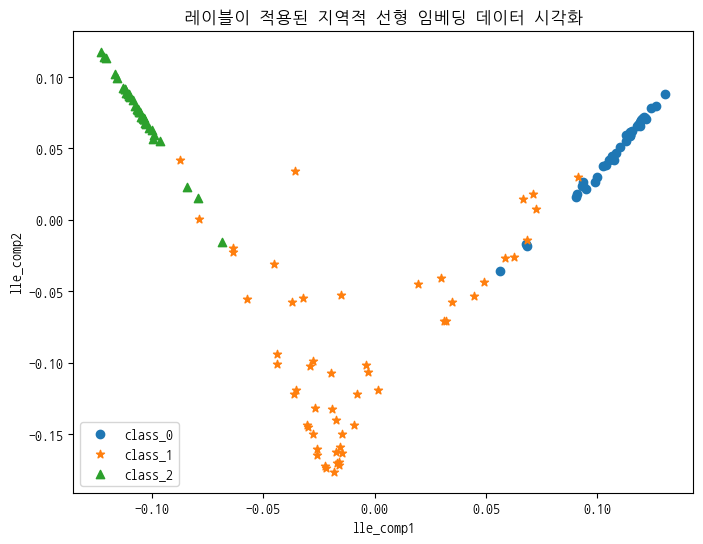

In [6]:
plt.figure(figsize=(8, 6))
markers = ['o', '*', '^']

for index, marker in enumerate(markers):
    df_index = x_train_df[x_train_df.label == index] # 레이블 별로 데이터를 분할한다.
    x = df_index.lle_comp1 # 레이블 별로 분할된 데이터의 첫 번째 주성분 벡터를 추출한다.
    y = df_index.lle_comp2 # 레이블 별로 분할된 데이터의 두 번째 주성분 벡터를 추출한다.
    label = raw_data.target_names[index] # 레이블 이름을 지정한다.
    plt.scatter(x=x, y=y, marker=marker, label=label) # 산포도를 그린다.

plt.title('레이블이 적용된 지역적 선형 임베딩 데이터 시각화')
plt.xlabel('lle_comp1')
plt.ylabel('lle_comp2')
plt.legend()
plt.show()

지역적 선형 임베딩 적용 전 데이터 학습

In [7]:
# 모델 생성 후 데이터 학습
from sklearn.ensemble import RandomForestClassifier # 앙상블 랜덤 포레스트 알고리즘을 사용하기 위해 import 한다.
# 앙상블의 랜덤 포레스트도 모델을 만든다.
clf = RandomForestClassifier(max_depth=2, random_state=0)
# 표준화된 학습 데이터와 학습 데이터에 따른 레이블 데이터로 앙상블 랜덤 포레스트 모델을 학습시킨다.
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [8]:
# predict() 메소드의 인수로 표준화된 테스트 데이터를 넘겨서 예측한다.
predict = clf.predict(x_test)
print(predict)

[2 1 0 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 2 0 0 2 0 0 0 2 1 2 2 0 1 1 1
 1 1 0 0 1 2 0 0]


In [9]:
# 혼동 행렬
# confusion_matrix() 메소드의 인수를 테스트 데이터의 실제값, 예측값 순서로 넘겨서 혼동 행렬를 만든다.
conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)

[[18  0  0]
 [ 1 16  0]
 [ 0  0 10]]


In [10]:
# 분류 리포트
# classification_report() 메소드의 인수를 테스트 데이터의 실제값, 예측값 순서로 넘겨서 분류 리포트를 만든다.
# target_names 속성으로 분류 리포트에 레이블의 실제값을 출력할 수 있다.
# class_report = classification_report(y_test, predict, target_names=raw_data.target_names) 
class_report = classification_report(y_test, predict, target_names=['A', 'B', 'C']) 
print(class_report)

              precision    recall  f1-score   support

           A       0.95      1.00      0.97        18
           B       1.00      0.94      0.97        17
           C       1.00      1.00      1.00        10

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



지역적 선형 임베딩 적용 후 데이터 학습

In [11]:
# 표준화된 학습 데이터를 주성분 분석을 적용한 데이터와 학습 데이터에 따른 레이블 데이터를 앙상블 랜덤 포레스트 모델을 학습시킨다.
clf.fit(x_train_lle, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [12]:
# predict() 메소드의 인수로 표준화된 테스트 데이터를 넘겨서 예측한다.
predict = clf.predict(x_test_lle)
print(predict)

[2 1 1 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 2 0 0 2 0 0 0 2 1 2 2 0 1 1 1
 1 1 0 0 1 2 1 0]


In [13]:
# 혼동 행렬
# confusion_matrix() 메소드의 인수를 테스트 데이터의 실제값, 예측값 순서로 넘겨서 혼동 행렬를 만든다.
conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)

[[16  2  0]
 [ 1 16  0]
 [ 0  0 10]]


In [14]:
# 분류 리포트
# classification_report() 메소드의 인수를 테스트 데이터의 실제값, 예측값 순서로 넘겨서 분류 리포트를 만든다.
# target_names 속성으로 분류 리포트에 레이블의 실제값을 출력할 수 있다.
# class_report = classification_report(y_test, predict, target_names=raw_data.target_names) 
class_report = classification_report(y_test, predict, target_names=['A', 'B', 'C']) 
print(class_report)

              precision    recall  f1-score   support

           A       0.94      0.89      0.91        18
           B       0.89      0.94      0.91        17
           C       1.00      1.00      1.00        10

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

